# Linear algebra assignment 
Lars Kuiper
\
389398
\
2-10-2023
\
Master Smart Systems Engineering

In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import cv2
import matplotlib.pyplot as plt
from PIL import Image 


## Assignment 1

### excercise on paper
For excerise 1a, I had to determine the matrix A. I got two differential equations. Image 'excercise 1a' shows the Matrix A determined by the differential equations.

For excercise 1b, I had to determine the Eigenvalues and Eigenvectors nummerically (using Numpy). After writing the code, I had to check the outcome by paper. I did it the other way arround. First, I determined the Eigenvalues and Eigenvectors on paper and after i finished, I wrote the code. The image 'excercise 1b' shows the Eigenvalue (lambda) and the Eigenvectors V1 and V2.

For excerise 1c, I had to solve the linear differential equation system. I did this by paper, because i felt more confident doing it on paper, and this won't took me a lot of time. The image excercise 1c shows the outcome.

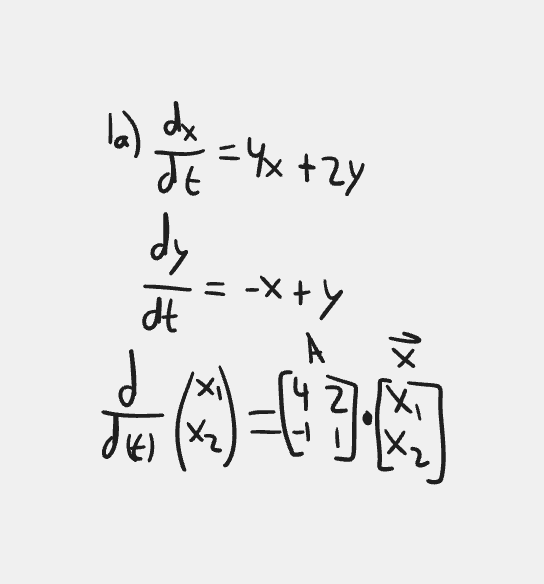

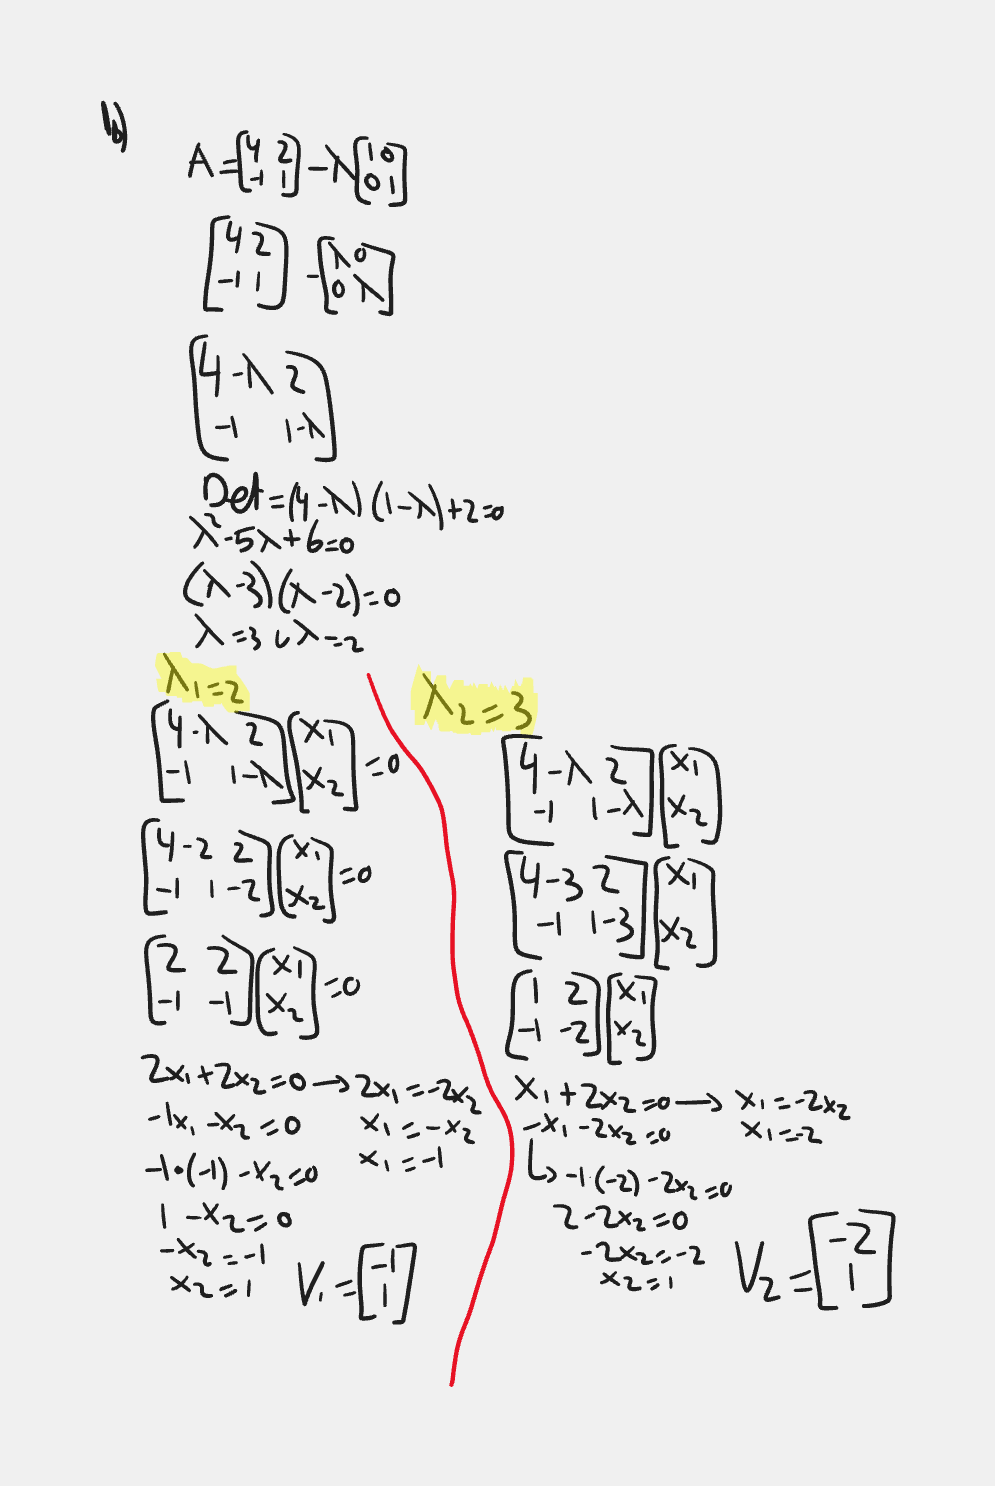

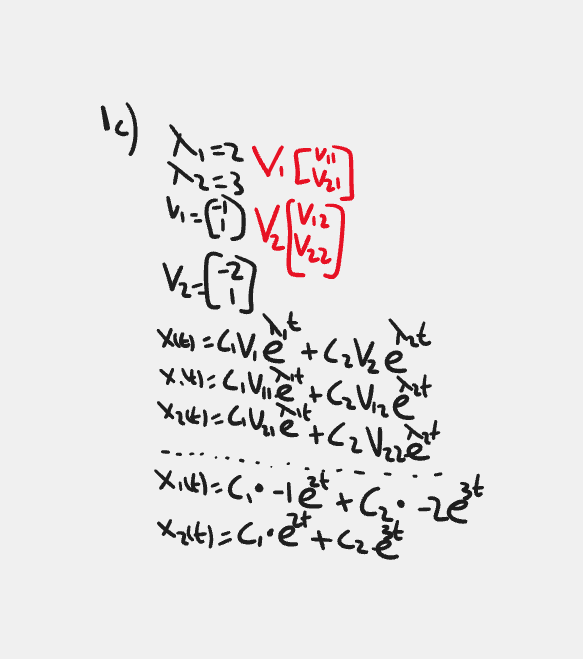

### code using Numpy
To determine the Eigenvalues and Eigenvectors, I wrote the code below with help of the internet[[1](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter15.04-Eigenvalues-and-Eigenvectors-in-Python.html)]. First, I made a Numpy matrix out of the differential equations (same as question 1a). For determine the Eigenvalues and Eigenvectors, I used a function from Numpy which calculates both (values and vectors) from the matrix. Next, I printed both values to see if the Eigenvalues and Eigenvectors matches with my own calculations. As you can see, the Eigenvalues match with the calculations I made in question 1. The eigenvector on the other hand don't match with the calcualtions I made.

In [2]:
matrix_for_eigenvalue = np.array([[4, 2],[-1, 1]])

#calculates eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(matrix_for_eigenvalue)
print("eigenvalues: ", eigenvalues)
print("eigenvectors: ", eigenvectors)


eigenvalues:  [3. 2.]
eigenvectors:  [[ 0.89442719 -0.70710678]
 [-0.4472136   0.70710678]]


I was really confused why Numpy gave me different results. I was confident about my own work, so I checked the results online by a calculator to see if I really did a good job. The calculator gave me the same answers I got by doing the calculations on paper. So, I searched for the problem and it had something to do with scaling and normalization. In a forum[[2](https://www.techtarget.com/whatis/definition/image-compression)], I saw a suggestion to using Sympy instead of Numpy. So I tried Sympy instead of Numpy and I got the same Eigenvectors as on paper.

In [3]:
#make a matrix
matrix_eigen_vector = sp.Matrix([[4, 2],[-1, 1]])
#calculates the eigenvectors 
vect = matrix_eigen_vector.eigenvects()
#make a numpy arre of the vectors
v_vec1 = np.array(vect[0][2], dtype=float)
v_vec2 = np.array(vect[1][2], dtype=float)
print("eigenvector v1: ", v_vec1)
print("eigenvector v2:", v_vec2)

eigenvector v1:  [[[-1.]
  [ 1.]]]
eigenvector v2: [[[-2.]
  [ 1.]]]


## Assignment 2 

For this assignment, a dataset and three models are given. The dataset consists of the output values of the Raspberry Pi at a given temperature. The three models are: a Linear model y=ax+b, polynomial of the second order(y=ax^2+bx+c), and polynomial of the third order(ax^3+bx^2+cx+d). The assignment is to solve this least-square problem using numpy. After the calculations give an explanation which model i would use for this sensor.

### Code
The program is written down below. First, the dataset will be opened by using a function from the csv library. Then an array is made (for x and y) by using numpy. There are three different x values, namely: one standard x, x to the power of two, and a x to the power of three. This is done for the different equations mentioned in the assignment description.


In [4]:
#Opens the csv file
data = pd.read_csv('dataset_assignment.csv')
data.head()
#make a array of the data 
data_in_array = np.array(data)
# Make a variable for x, x^2, and x^3
x_array = data_in_array[:, 0]

x_power_2 = x_array **2

x_power_3 = x_array **3

y_array = data_in_array[:,1]

print(x_array)
print(x_power_2)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
[   1    4    9   16   25   36   49   64   81  100  121  144  169  196
  225  256  289  324  361  400  441  484  529  576  625  676  729  784
  841  900  961 1024 1089 1156 1225 1296 1369 1444 1521 1600 1681 1764
 1849]


The piece of code down below makes sure that the a and b values of the linear model will be calculated. This is done by stacking the matrix [[3](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html)] and after it is stacked another function from numpy is used to calculate the a and b

In [5]:
#linear Module
# y = ax + b 
#m is the slope and c is the intercept
#stack the array from 1D into 2D
x_matrix = np.column_stack((x_array, np.ones_like(x_array)))
# Calculate a,b by using a np function
a, b = np.linalg.lstsq(x_matrix, y_array, rcond=None)[0]

print(a, b)

9.170039263062522 -25.159468438538223


For the second order, I used the same trick as I did from the linear module. Only this time, instead of stacking the normal x array, i stack [[3](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html)] the x matrix from the linear module with the 'x to the power of two array'. After it is stacked, another numpy function is used to calculate abc (in the formula described as e,c,d).

In [6]:
#second order
# y = ex^2 + cx +d 
#stack the array from 1D into 2D
x_second = np.column_stack((x_matrix, x_power_2))
# Calculate c,d,e by using a np function
c, d, e = np.linalg.lstsq(x_second, y_array, rcond=None)[0]

print(c, d, e)

10.452377269166801 -34.77700348432065 -0.029144045593286004


For the third order model, I did the same trick as I used for the second order model. Only this time, instead of stacking the normal x matrix with the 'x to the power of two'[[3](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html)]. I stack the the stacked array from the second order with the 'x to the power of three'. When it is stacked another numpy function is used to calculate the abcd (in formula discribed as i,h,f,g)

In [7]:
#third order 
#y = ix3 + hx2 + fx + g
x_third = np.column_stack((x_second, x_power_3))
# Calculate f,g,h,i by using a np function
f, g, h, i = np.linalg.lstsq(x_third, y_array, rcond=None)[0]

print(f, g, h, i)

1.2960668842500387 0.7105177862406162 0.4851678568786261 -0.007792604582907658


The small line of code down below does the same tricks as all the code above. When I finished writing the code with a classmate, I came a cross this line of code[[4](https://saturncloud.io/blog/understanding-the-differences-numpypolyfit-vs-numpypolynomialpolynomialpolyfit/)]. If the user replace the 3 for a 2, it will print the values for a second order model. When the 3 is replaced with a 1, it will print the values for the first order model.

In [8]:
#simple fuction for getting the polynomial 

z = np.polyfit(x_array, y_array, 3)
print(z)

[-0.0077926   0.48516786  1.29606688  0.71051779]


The plot below shows the orignal data plotted in a graph. This graph is my reference for the models. The graph consists of the raw data from the dataset.

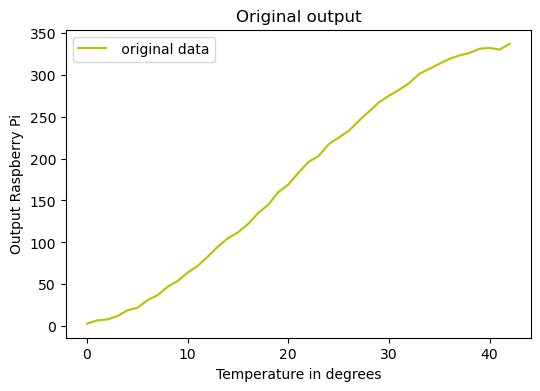

In [9]:
#set the array in variable called original_data to make it clear
original_data = y_array
#plot the graph
plt.figure(figsize=(6,4))
plt.plot(original_data,'y', label=' original data')
#give the figure titles and a label
plt.title('Original output')
plt.xlabel('Temperature in degrees')
plt.ylabel('Output Raspberry Pi')

plt.legend()
plt.show()

Down below is the code for plotting the different modules. I solved the least-quare problem in the code above and to make it visible which model is the best in my opinion. I will plot all of the models with the variables and make it visible which model fits the orignal graph.

As you can see in the figure, the three models are plotted and the graphs are visible. The linear and second order graphs looks similar to each other but the third order model looks totally different. The third order model looks almost identical to the original graph. The curves are almost identical, the only difference is that the third order model is a bit smoother. This is due to the fact that it is a model instead of meassured data.

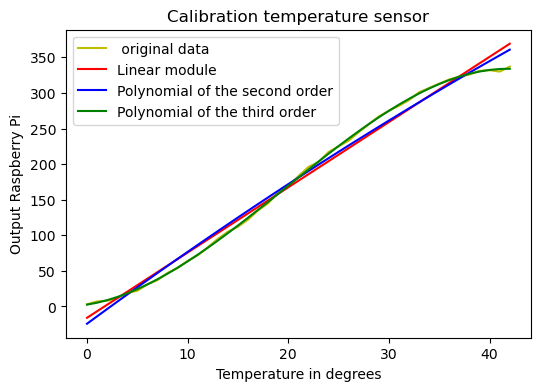

In [10]:
#calculate the y by using the equations
original_data = y_array
y1 = a*x_array + b
y2 = e*x_power_2+ c*x_array + d 
y3 = i*x_power_3 + h*x_power_2 + f*x_array + g
#plot the original data
plt.figure(figsize=(6,4))
plt.plot(original_data,'y', label=' original data')
#plot all the models
plt.plot(y1,'r', label='Linear module')
plt.plot(y2, 'b', label='Polynomial of the second order')
plt.plot(y3, 'g', label='Polynomial of the third order')
#give the graph titles
plt.title('Calibration temperature sensor')
plt.xlabel('Temperature in degrees')
plt.ylabel('Output Raspberry Pi')

plt.legend()
plt.show()

The figure below shows the two graphs again. I plotted the model and the original data again to make it clear how identical these two are. 

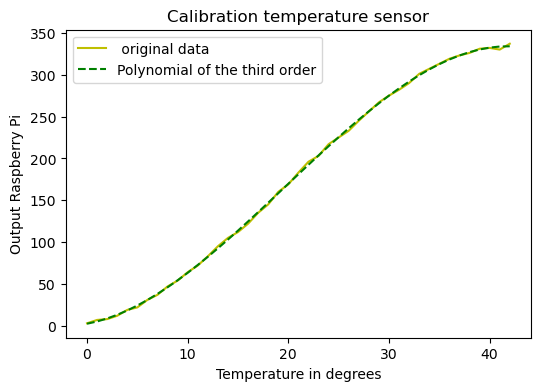

In [11]:
plt.figure(figsize=(6,4))

plt.plot(original_data,'y', label=' original data')
plt.plot(y3, 'g--', label='Polynomial of the third order')


plt.title('Calibration temperature sensor')
plt.xlabel('Temperature in degrees')
plt.ylabel('Output Raspberry Pi')

plt.legend()
plt.show()

## Assignment 3

The third assignment is about singular value decomposition. The question is: Determine the matrix Σ and V for the following matrix A (you can calculate this on paper and add a scan of the solution to your Jupyter notebook). I choose to do this my hand, because I am more confident doing it by hand.

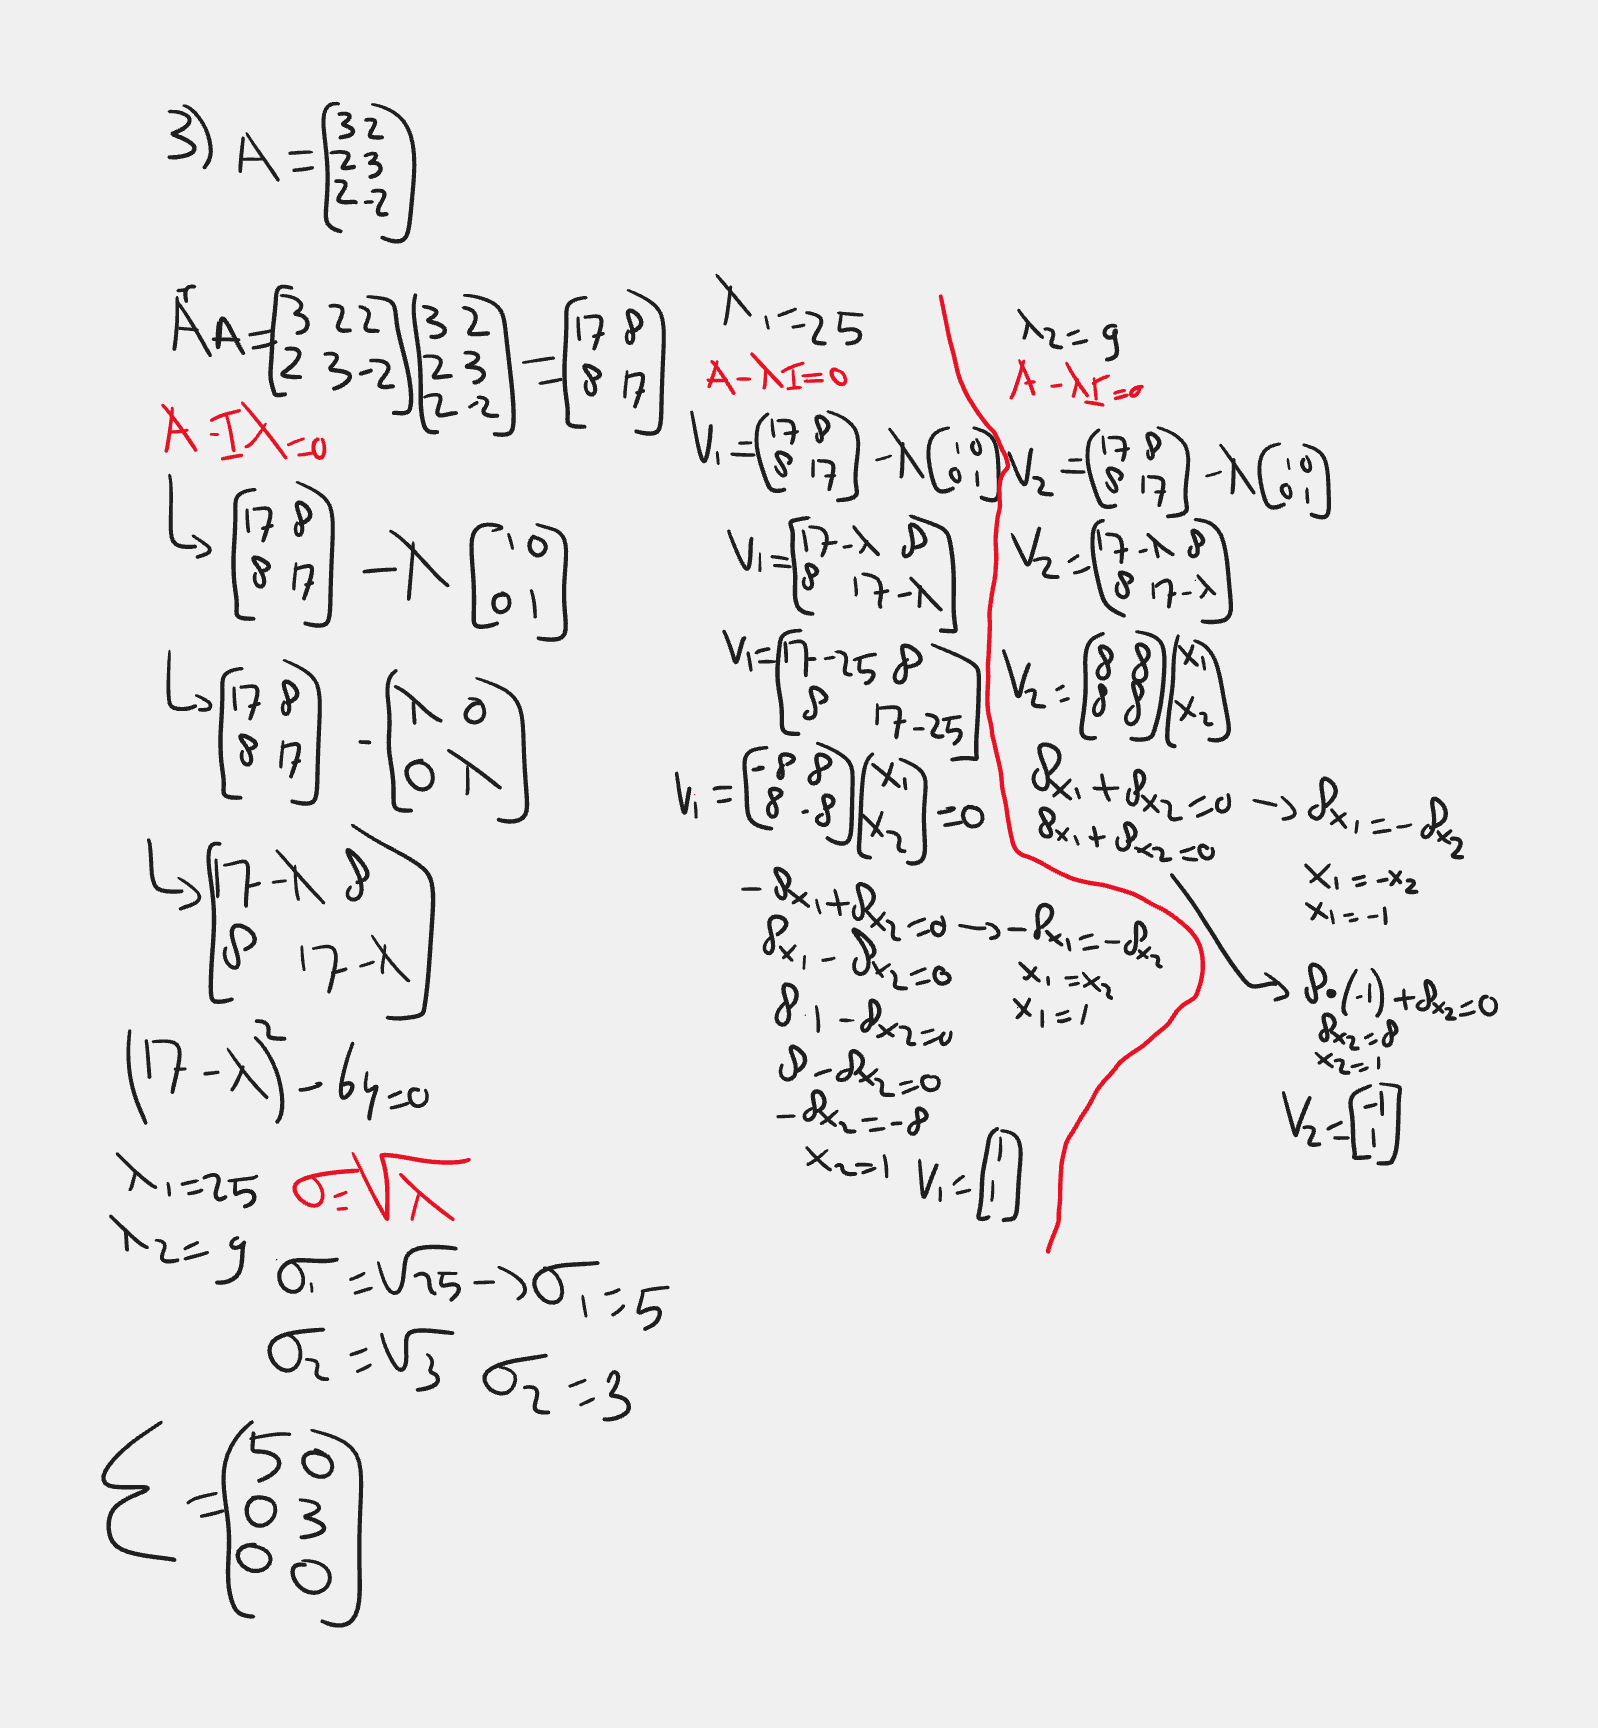

## Assignment 4

Assignment 4 is about singular value decomposition. A none-quadratic picture is used for this assignment with a dimention of 880 x 542. The first question is: nvestigate the dependency of the reconstructed image on the number(r)of singular values that you use for reconstruction. Choose at least 5 values of r
for that investigation. Also produce an error image (difference between original and from approximated matrix reconstructed image). Indicate the compression ratio for each r.

The code belows opens the image and converts the image into gray scale of a faster computation[[5](https://www.geeksforgeeks.org/python-grayscaling-of-images-using-opencv/)]. than the original gray image is plotted. Then SVD is calculated by using a numpy function[[6](https://www.geeksforgeeks.org/image-reconstruction-using-singular-value-decomposition-svd-in-python/)].

u.shape:(542, 542),s.shape:(542,),v.shape:(542, 880)


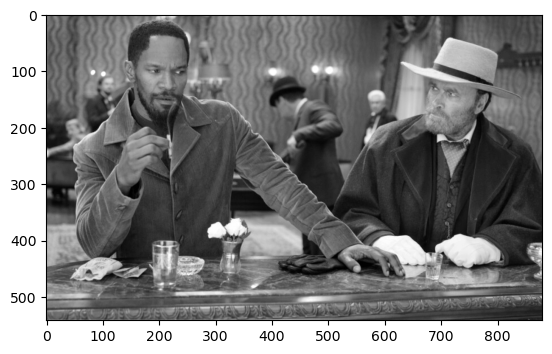

In [12]:
img = 'django.jpeg'
  
# Converting the image into gray scale for faster
# computation. 
gray_image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
#plot the original image 
plt.imshow(gray_image, cmap='gray')

# Calculating the SVD
u, s, v = np.linalg.svd(gray_image, full_matrices=False)

# inspect shapes of the matrices
print(f'u.shape:{u.shape},s.shape:{s.shape},v.shape:{v.shape}')


## Code
This piece of code is responsible for the recontruction of the image for each value of r [[6](https://www.geeksforgeeks.org/image-reconstruction-using-singular-value-decomposition-svd-in-python/)]. Then, it calculates the compression ratio for each r value[[7](https://www.kaggle.com/code/vananhng/image-compression-with-svd)]. After that, the error image is produced by a equation. Last but not least, images are plotted for each r value and the compression for each image is given as well as the error image.

Compression rate is 0.0%


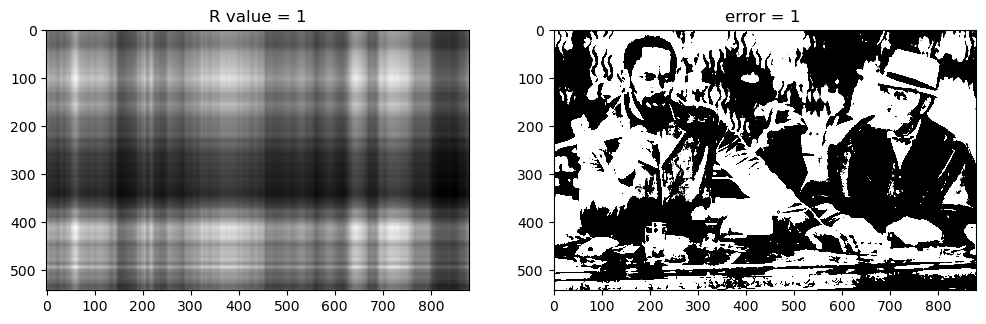

Compression rate is 0.3%


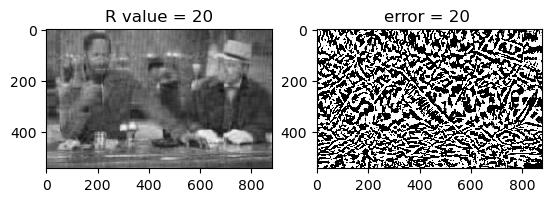

Compression rate is 0.6%


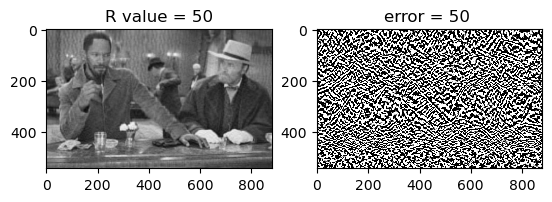

Compression rate is 0.9%


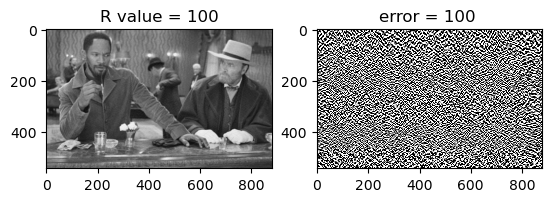

Compression rate is 1.19%


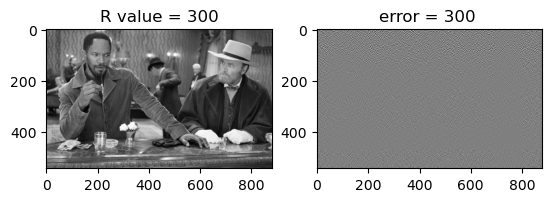

In [13]:
# plot images with different number of components
r_values = [1, 20, 50, 100, 300]
plt.figure(figsize=(12, 6))
#dimensions of the image
w = 880
h = 542
#
for i in range (len(r_values)):

    original_size = w * h
    # calculate the compressed size for the compression ratio
    compressed_size = i * (1 + w + h)
    
    #recontruct the image by using np functions
    
    reconstructed_image = u[:, :r_values[i]] @ np.diag(s[:r_values[i]]) @ v[:r_values[i], :]
    
    # Calculate the compression ratios for each i
    ratio = compressed_size * 1.0 / original_size
    # Calculate the error image
    error = gray_image - reconstructed_image
    
    
    # plot the reconstructed image
    plt.subplot(1,2,1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'R value = {r_values[i]}')
    # plot the error image
    plt.subplot(1,2,2)
    plt.imshow(error, cmap='gray', vmin = -1, vmax = 1)
    plt.title(f'error = {r_values[i]} ')
    #print the compression rate
    print('Compression rate is ' + str( round(ratio * 100 ,2)) + '%' ) 
    plt.show()

       

        


## Discussion

4b) **Which r would you use so that you can still perform face recognition on the reconstructed image?**
      
   For face recognition it is wise to use a higher value for r, because there will be more details visible. The down side of a higher r means larger image files. Looking at the results of the code, a r value of 50 is good enough for face recognition. The faces are recognizable.
   
4c) **Which r would you chose if you had to recognize dark and bright spot in the image only?**
    For recognizing dark and bright spots, i would go for a low r value. A lower r value means less details and more dark and bright spots. From the results of the code, I would choose a r value of 1. So, the image only shows the dark and bright spots in the image.
    
4d) **Which r would you chose if you had to recognize forms (like cars, people, etc.)**
    For recognize forms, I would choose the same r as for the face recognition. Maybe the r can be a bit lower because faces need some more detail than forms and shapes. But the r value of 50 shows some good forms and shapes.
    
4e) **Can you think of other methods to do image compression without losing too much information?**
    There are a couple of other methods that can be used for image compression without losing too much information. one of the methods I can think of is  **PNG compression**. PNG compression compresses the image without losing any information, but it results in larger files [[8](https://www.techtarget.com/whatis/definition/image-compression)].
    Another methode which can be used for image compression without losing too much information is **WebP Compression**. WebP is a modern image format developed by Google that offers both lossless and lossy compression. It can achieve good compression ratios while maintaining reasonable image quality[[8](https://www.techtarget.com/whatis/definition/image-compression)].
    

# References
[1]https://pythonnumericalmethods.berkeley.edu/notebooks/chapter15.04-Eigenvalues-and-Eigenvectors-in-Python.html

[2]https://www.techtarget.com/whatis/definition/image-compression

[3]https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html

[4]https://saturncloud.io/blog/understanding-the-differences-numpypolyfit-vs-numpypolynomialpolynomialpolyfit/

[5]https://www.geeksforgeeks.org/python-grayscaling-of-images-using-opencv/

[6]https://www.geeksforgeeks.org/image-reconstruction-using-singular-value-decomposition-svd-in-python/

[7]https://www.kaggle.com/code/vananhng/image-compression-with-svd

[8]https://www.techtarget.com/whatis/definition/image-compression




